In [1]:
# sorgt dafür, dass, wenn die letzte Zeile eine Zuweisung ist, deren Ergebnis auch ausgegeben wird
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# Im Quelltext wird dieses Verhalten mit dem Kommentar `#:` gekennzeichnet

In [2]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

def show_book(figname, saveandshow=True):
    """
    Diese Funktion dient dazu Abbildungen abzuspeichern und den Name der Abbildung
    mit in den Quelltextschnipsel einzufügen
    """
    print(r"Siehe Abbildung §\ref{fig_XXX}§".replace("XXX", figname))
    if saveandshow:
        plt.savefig(f"{figname}_snip.pdf")
        plt.show()
    
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 18


plt.rcParams['figure.subplot.left'] = .13


`begin statik1`

In [3]:
# Notwendige Symbole erstellen 
FAh, FAv, FBv, FL, l1, l2, alpha = \
    sp.symbols("F_Ah, F_Av,  F_Bv, F_L, l1, l2, alpha")


# Linke Seiten der Bilanzgleichungen ("equations")
# (rechte Seiten sind 0)
eqns = [
    FAh - FL*sp.cos(alpha),
    FAv + FBv - FL*sp.sin(alpha),
    -l1*FL*sp.sin(alpha) + l2*FBv
]

sol_dict = sp.solve(eqns, [FAh, FAv, FBv])

{F_Ah: F_L*cos(alpha),
 F_Av: (-F_L*l1*sin(alpha) + F_L*l2*sin(alpha))/l2,
 F_Bv: F_L*l1*sin(alpha)/l2}

`end statik1`

In [4]:
!python3 ../../nbsnippets.py kapitel_mechanik.ipynb

Extracting snippets in kapitel_mechanik.ipynb
Extracting snippets: statik1, balken1, balken2, balken3, balken4, rotationsmatrix, kinematik1, kinematik2, kinematik3, kinematik4, kinematik5, kinematik6, kinematik7, kinematik8, kinematik9, kinematik10, kinematik11, lagrange1, lagrange2, lagrange3, lagrange4, lagrange5, lagrange6, lagrange7, lagrange8, lagrange9, lagrange10, lagrange10-subsreihenfolge, lagrange11, lagrange12, lagrange13, lagrange14, lagrange15
Done


In [5]:
print(sp.latex(sol_dict))

\left\{ F_{Ah} : F_{L} \cos{\left(\alpha \right)}, \  F_{Av} : \frac{- F_{L} l_{1} \sin{\left(\alpha \right)} + F_{L} l_{2} \sin{\left(\alpha \right)}}{l_{2}}, \  F_{Bv} : \frac{F_{L} l_{1} \sin{\left(\alpha \right)}}{l_{2}}\right\}


`begin balken1`

In [6]:
E, I, q0, l, x = sp.symbols("E, I, q0, l, x")

In [7]:
w = sp.Function("w")(x)

w(x)

In [8]:
sol = sp.dsolve(w.diff(x, 4) - q0/(E*I), w)

# dsolve liefert ein `Equality`-Objekt
# relevant ist dessen rechte Seite
w_sol = sol.rhs

C1 + C2*x + C3*x**2 + C4*x**3 + q0*x**4/(24*E*I)

`end balken1`

`begin balken2`

In [9]:
w_sol.subs([("C1", 0), ("C2", 0)])

C3*x**2 + C4*x**3 + q0*x**4/(24*E*I)

`end balken2`

`begin balken3`

In [10]:
# Randbedingungen: linke Seiten der vier
# "lhs=0"-Gleichungen in einer Liste anordnen
eqns = [
    w_sol.subs(x, 0),
    w_sol.diff(x).subs(x, 0),
    w_sol.diff(x, 2).subs(x, l),
    w_sol.diff(x, 3).subs(x, l),    
]


[C1, C2, 2*C3 + 6*C4*l + l**2*q0/(2*E*I), 6*C4 + l*q0/(E*I)]

In [11]:
sol_dict = sp.solve(eqns, ["C1", "C2", "C3", "C4"])

{C1: 0, C2: 0, C3: l**2*q0/(4*E*I), C4: -l*q0/(6*E*I)}

`end balken3`

`begin balken4`

In [12]:
# numerische Parameter einsetzen
b, h = 0.2, 0.04  # Breite, Dicke [m]
Enum = 10*1e9  # Elastitizitätsmodul (Holz) [N/m**2]
q0num = 100  # konstante Streckenlast [N/m]
Inum = b*h**3/12  # Flächenträgheitsmoment
lnum = 5  # [m]

param_values = [(E, Enum), (I, Inum), (q0, q0num), (l, lnum)]
w_sol_num = w_sol.subs(sol_dict).subs(param_values)

0.000390625*x**4 - 0.0078125*x**3 + 0.05859375*x**2

Siehe Abbildung §\ref{fig_eingespannter_balken}§


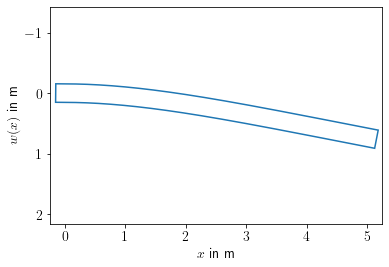

In [13]:
# zum Plotten umwandeln in aufrufbare Funktion

w_func = sp.lambdify(x, w_sol_num, modules="numpy")

xx = np.linspace(0, lnum, 1000)
ww = w_func(xx)  # numerische Auswertung der Biegelinie
plt.plot(xx, ww, lw=20) # dicke dunkle Linie
plt.plot(xx, ww, lw=17, color="white") # etwas dünner, weiß
plt.gca().invert_yaxis()
plt.axis("equal")

plt.xlabel("$x$ in m") #!
plt.ylabel(r"$w(x)$ in m") #!
show_book("eingespannter_balken") #!

`end balken4`

In [14]:
!python3 ../../nbsnippets.py kapitel_mechanik.ipynb

Extracting snippets in kapitel_mechanik.ipynb
Extracting snippets: statik1, balken1, balken2, balken3, balken4, rotationsmatrix, kinematik1, kinematik2, kinematik3, kinematik4, kinematik5, kinematik6, kinematik7, kinematik8, kinematik9, kinematik10, kinematik11, lagrange1, lagrange2, lagrange3, lagrange4, lagrange5, lagrange6, lagrange7, lagrange8, lagrange9, lagrange10, lagrange10-subsreihenfolge, lagrange11, lagrange12, lagrange13, lagrange14, lagrange15
Done


In [15]:
# Einfach-Integral über die Variable x
# in den Grenzen von 0 bis x
# (mathematisch nicht ganz sauber, aber
# sympy weiß wie es gemeint ist)

sp.integrate(q0, (x, 0, x))

q0*x

In [16]:

# Vierfach-Integral nach dem gleichen Muster

sp.integrate(q0, x, x, x, x)

q0*x**4/24

`begin rotationsmatrix`

In [17]:
def R(phi):
    """
    Rotationsmatrix in der Ebene
    """
    c = sp.cos(phi)
    s = sp.sin(phi)
       
    return  sp.Matrix([[c, -s], [s, c]])
    
R("theta1") # Rotationsmatrix

Matrix([
[cos(theta1), -sin(theta1)],
[sin(theta1),  cos(theta1)]])

`end rotationsmatrix`

## Kinematik

`begin kinematik1`

In [18]:
# Einheitvektoren in x- und y- Richtung
ex = sp.Matrix([1, 0]) 
ey = sp.Matrix([0, 1]) 

# Symbole für die Winkel definieren
theta1, theta2, theta3 = ttheta = sp.symbols("theta1:4")

# Längen der Glieder
l1, l2, l3, l4 = 0.3, 0.6, 0.7, 0.9

`end kinematik1`

Geometrie der offenen kinematischen Kette

`begin kinematik2`

In [19]:
# Basis 1 und 2
B1 = sp.Matrix([0, 0])
B2 = sp.Matrix([l4, 0])

G1 = B1 + R(theta1)*ex*l1
G2 = G1 + R(theta1 + theta2)*ex*l2

# Ende der offenen Kette
E = G2 + R(theta1 + theta2 + theta3)*ex*l3

# Zusammenfassen der Koord. aller Punkte in einer Matrix
# (später fürs Plotten benötigt)
joints = sp.Matrix.hstack(B1, G1, G2, E, B2)

# Kettenschlussbedingung (2 skalare Gleichungen)
constraints = sp.Matrix([E - B2]) ##:
pass #!

`end kinematik2`

In [20]:
# nicht direkt im Buch, um ungerenderten LaTeX-Code in Ausgabe zu vermeiden
# stattdessen wird der LaTeX-Code in das Buch-Dokument kopiert.

`begin kinematik3`

In [21]:
#! print(sp.latex(sp.Eq(constraints, sp.Matrix([0, 0]))))

`end kinematik3`

In [22]:
print(sp.latex(sp.Eq(constraints, sp.Matrix([0, 0])) ))

\left[\begin{matrix}0.3 \cos{\left(\theta_{1} \right)} + 0.6 \cos{\left(\theta_{1} + \theta_{2} \right)} + 0.7 \cos{\left(\theta_{1} + \theta_{2} + \theta_{3} \right)} - 0.9\\0.3 \sin{\left(\theta_{1} \right)} + 0.6 \sin{\left(\theta_{1} + \theta_{2} \right)} + 0.7 \sin{\left(\theta_{1} + \theta_{2} + \theta_{3} \right)}\end{matrix}\right] = \left[\begin{matrix}0\\0\end{matrix}\right]


`begin kinematik4`

In [23]:
# Umwandeln symb. Ausdrücke in aufrufbare Funktionen
c_func = sp.lambdify(ttheta, constraints, modules="numpy")

<function _lambdifygenerated(theta1, theta2, theta3)>

`end kinematik4`

`begin kinematik5`

In [24]:
# Zielfunktion für Minimierung
def target_func(X, theta1):    
    # "Kettenschluss-Fehlervektor":
    err = c_func(theta1, X[0], X[1])
    return err[0]**2 + err[1]**2

`end kinematik5`

`begin kinematik6`

In [25]:
# isolierter Test der Nebenbedingungen u. Minimierung
from scipy.optimize import fmin

# Startwert und zugehörige -schätzung (0, 0)
ttheta0 = [0.25*np.pi, 0, 0]

# Auswertung der des Fehlervektors
err = c_func(*ttheta0)

array([[0.23137085],
       [1.13137085]])

In [26]:

# Zielfunktion (Betragsquadrat von err)
target_func(ttheta0[1:], ttheta0[0])

array([1.33353247])

`end kinematik6`

`begin kinematik7`

In [27]:
# Test der Minimierung
res = fmin(target_func, x0=ttheta0[1:], args=(ttheta0[0],))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 82
         Function evaluations: 149


array([-2.18923901,  1.97689051])

`end kinematik7`

`begin kinematik8`

Siehe Abbildung §\ref{fig_viergelenk_plot1}§


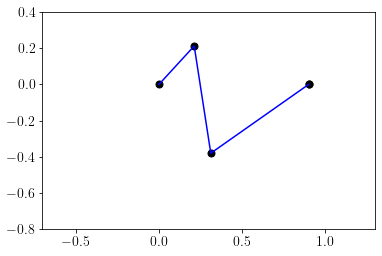

In [28]:
# isolierter Test des Plottens

# Umwandeln symb. Ausdrücke in aufrufbare Funktionen
j_func = sp.lambdify(ttheta, joints, modules="numpy")

# Auswerten -> Array mit shape=(2, 5)
jc = joint_coords = j_func(ttheta0[0], *res)

plt.plot(jc[0, :], jc[1, :], "ko", ms=7) # schw. Kreise, Größe 7
plt.plot(jc[0, :], jc[1, :], "b-") # blaue linien

# plt.axis("equal")
plt.axis([-0.7, 1.3, -0.8, 0.4])
show_book("viergelenk_plot1") #!

`end kinematik8`

Test der Minimierung mit anderer Startschätzung

In [29]:
# Test der Minimierung mit anderer Startschätzung

res = fmin(target_func, x0=[0, -2], args=(ttheta0[0],))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 45
         Function evaluations: 86


array([ 0.02016544, -1.97692043])

(-0.5, 1.4, -0.4, 0.9)

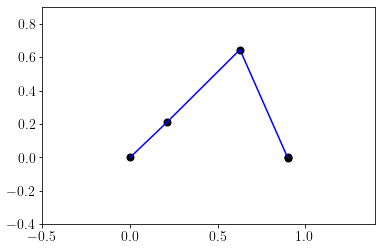

In [30]:
jc = joint_coords = j_func(ttheta0[0], *res)

plt.plot(jc[0, :], jc[1, :], "ko", ms=7) # schw. Kreise, Größe 7
plt.plot(jc[0, :], jc[1, :], "b-") # blaue linien

# plt.axis("equal")
plt.axis([-0.5, 1.4, -0.4, 0.9])

`begin kinematik9`

In [31]:
# Interaktion zwischen Optimierung und Gleichungslösung

from ipywidgets import interact

@interact(theta1num=(0, 7, 0.2)) # (min, max, step)
def plot_func(theta1num):
    res = fmin(target_func, x0=[0, 0], args=(theta1num,), disp=0)

    # das wird ein array mit shape=(2, 5)
    jc = joint_coords = j_func(theta1num, *res)

    plt.plot(jc[0, :], jc[1, :], "ko", ms=7)
    plt.plot(jc[0, :], jc[1, :], "b-")  
    plt.axis("equal")
    plt.axis([-0.7, 1.3, -0.8, 0.4])
    
interact_fname = "viergelenk_interact" #!
show_book(interact_fname, saveandshow=False) #!

interactive(children=(FloatSlider(value=3.0, description='theta1num', max=7.0, step=0.2), Output()), _dom_clas…

Siehe Abbildung §\ref{fig_viergelenk_interact}§


`end kinematik9`

In [32]:
# Erzeugung kommt nicht ins Buch, Grafik schon
# Zwiebelschalen-Grafik (Anpassung der Alpha-Werte)

Siehe Abbildung §\ref{fig_viergelenk_interact}§


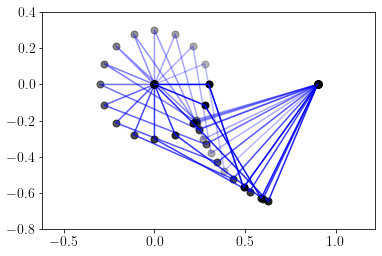

In [33]:
N = 17
theta1_values = np.linspace(0, 2, N)*np.pi
alpha_values = np.linspace(0.5, 1, N)


def plot_func(theta1num, alpha):
    res = fmin(target_func, x0=[0, 0], args=(theta1num,), disp=0)

    # das wird ein array mit shape=(2, 5)
    jc = joint_coords = j_func(theta1num, *res)

    plt.plot(jc[0, :], jc[1, :], "ko", ms=7, alpha=alpha)
    plt.plot(jc[0, :], jc[1, :], "b-", alpha=alpha)  
    plt.axis("equal")
    plt.axis([-0.7, 1.3, -0.8, 0.4])


# gemeinsam über theta1-Werte und alpha-Werte iteriern
for theta1num, alpha in zip(theta1_values[::1], alpha_values):
    plot_func(theta1num, alpha**2)

show_book(interact_fname, saveandshow=True) #!

In [34]:
theta1num = np.pi/4

0.7853981633974483

`begin kinematik10`

In [35]:
assert target_func(res, theta1num) < 1e-5

`end kinematik10`

Koppelkurve

`begin kinematik11`

In [36]:
# Erinnerung: G1 = B1 + R(theta1)*ex*l1

kx, ky = 0.25, 0.45

# Hilfspunkt (für verständlichere Visualisierung)
H = G1 + R(theta1 + theta2)*ex*kx
# Betrachteter Punkt auf der Koppel (mit ey ⊥ ex):
K = H + R(theta1 + theta2)*ey*ky

k_func = sp.lambdify(ttheta, K, modules="numpy")

N = 40
theta1_values = np.linspace(0, 2, N)*np.pi
KK = []
for theta1num in theta1_values:
    res = fmin(target_func, x0=[0, 0], args=(theta1num,), disp=0)
    KK.append(k_func(theta1num, *res))
# ploten ...
koppelkurve_fname = "viergelenk_koppelkurve" #!
show_book(koppelkurve_fname, saveandshow=False) #!

Siehe Abbildung §\ref{fig_viergelenk_koppelkurve}§


`end kinematik11`

Siehe Abbildung §\ref{fig_viergelenk_koppelkurve}§


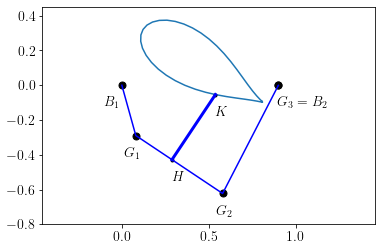

In [37]:
h_func = sp.lambdify(ttheta, H, modules="numpy")

# list -> array (shape: 2 x N)
KK = np.column_stack(KK)

plt.plot(KK[0, :], KK[1, :])


theta1num = -1.3
res = fmin(target_func, x0=[0, 0], args=(theta1num,), disp=0)
jc = joint_coords = j_func(theta1num, *res)
hc = h_func(theta1num, *res)
kc = k_func(theta1num, *res)

hkc = np.column_stack([hc, kc])


plt.plot(hkc[0, :], hkc[1, :], "ko", ms=3)  # graue Secchecke

plt.plot(jc[0, :], jc[1, :], "ko", ms=7) # schw. Kreise, Größe 7
plt.plot(jc[0, :], jc[1, :], "b-") # blaue linien
plt.plot(hkc[0, :], hkc[1, :], "b-", lw=3) # blaue linien

dy = -.12
plt.text(hc[0, :], hc[1, :]+dy, "$H$")
plt.text(kc[0, :], kc[1, :]+dy, "$K$")


txt = ["$B_1$", "$G_1$", "$G_2$", "$G_3=B_2$", ""]
for i, arr in enumerate(jc.T):
    plt.text(arr[:1] -.1+.03*i , arr[1:] + dy, txt[i])


plt.axis("equal")
plt.axis([-0.5, 1.5, -0.8, 0.45])
show_book(koppelkurve_fname, saveandshow=True)

In [38]:
!python3 ../../nbsnippets.py kapitel_mechanik.ipynb

Extracting snippets in kapitel_mechanik.ipynb
Extracting snippets: statik1, balken1, balken2, balken3, balken4, rotationsmatrix, kinematik1, kinematik2, kinematik3, kinematik4, kinematik5, kinematik6, kinematik7, kinematik8, kinematik9, kinematik10, kinematik11, lagrange1, lagrange2, lagrange3, lagrange4, lagrange5, lagrange6, lagrange7, lagrange8, lagrange9, lagrange10, lagrange10-subsreihenfolge, lagrange11, lagrange12, lagrange13, lagrange14, lagrange15
Done


# Dynamik
## Lagrange-Gleichungen 2. Art

`begin lagrange1`

In [39]:
s1, s2, m1, m2, l1, l2, g, t = sp.symbols("s1, s2, m1, m2, l1, l2, g, t")

In [40]:
# Gelenkwinkel (= Relativwinkel)
# angelegt als Zeitfunktionen (und nicht als Symbol),
# damit später die totale Zeitableitung d/dt anwendbar ist

theta1 = sp.Function("theta1")(t)
theta2 = sp.Function("theta2")(t)

# Einheitsvektor in y-Richtung
ey = sp.Matrix([0, 1])

# Koordinatenursprung
O = sp.Matrix([0, 0]) 

# Schwerpunkt1:
S1 = O + R(theta1)*(-ey)*s1

# Gelenk1: 
G1 = O + R(theta1)*(-ey)*l1

# Schwerpunkt2:
S2 = G1 + R(theta1+theta2)*(-ey)*s2

# Gelenk2 (nur für grafische Darstellung): 
G2 = G1 + R(theta1+theta2)*(-ey)*l2
pass #!

`end lagrange1`

`begin lagrange2`

In [41]:
# Potentielle Energie (unnormiert)
V_tmp = m1*g*S1[1] + m2*g*S2[1]

# normieren, sodass V >= 0
V = V_tmp - V_tmp.subs([(theta1, 0), (theta2, 0)])
pass #!

`end lagrange2`

`begin lagrange3`

In [42]:
# Schwerpunktsgeschwindigkeiten
S1d = S1.diff(t)
S2d = S2.diff(t)

# kinetische Energie
T_tmp = m1/2*S1d.T*S1d + m2/2*S2d.T*S2d

# Umwandeln: 1x1-Matrix -> Skalarer Ausdruck
T = T_tmp[0, 0]
pass #!

`end lagrange3`

`begin lagrange4`

In [43]:
# Lagrange-Funktion
L = T - V
print(L.count_ops())

94


`end lagrange4`

`begin lagrange5`

In [44]:
thetadot1 = theta1.diff(t)
thetadot2 = theta2.diff(t)

alpha1 = L.diff(thetadot1)
alpha2 = L.diff(thetadot2)

beta1 = alpha1.diff(t)
beta2 = alpha2.diff(t)

gamma1 = L.diff(theta1)
gamma2 = L.diff(theta2)
pass #!

`end lagrange5`

`begin lagrange6`

In [45]:
# Zusammenfassen der "equations of motion"
ee = sp.Matrix([beta1 - gamma1, beta2 - gamma2])
ee.applyfunc(sp.count_ops)

Matrix([
[145],
[101]])

`end lagrange6`

`begin lagrange7`

In [46]:
# Beschleunigungen
thetaddot1 = thetadot1.diff(t)
thetaddot2 = thetadot2.diff(t)
pass #!

In [47]:
# Massenmatrix
M = ee.jacobian([thetaddot1, thetaddot2])
M.applyfunc(sp.count_ops)

Matrix([
[61, 39],
[33, 17]])

In [48]:
# Vektor der Coriolis- und Zentrifugalterme
C = ee.subs([(thetaddot1, 0), (thetaddot2, 0), (g, 0)])
C.applyfunc(sp.count_ops)

Matrix([
[70],
[56]])

In [49]:
# Vektor Potentialterme (bzw. alles was übrig bleibt)
K = ee - M*sp.Matrix([thetaddot1, thetaddot2]) - C
K.simplify()
K.applyfunc(sp.count_ops)

Matrix([
[17],
[ 7]])

`end lagrange7`

`begin lagrange8`

In [50]:
# Plausibilitätsprüfung:
# Potentialterme müssen für g = 0 verschwinden
K.subs(g, 0)

Matrix([
[0],
[0]])

`end lagrange8`

`begin lagrange9`

In [51]:
ffbar = M.inv()*(-C-K)
ffbar.applyfunc(sp.count_ops)

Matrix([
[403],
[482]])

`end lagrange9`

`begin lagrange10`

In [52]:
# Zustand einführen
x1, x2, x3, x4 = xx = sp.symbols("x1:5")

# Funktionen und Ableitungen ersetzen
replamcements = [(theta1, x1), (theta2, x2),
                 (thetadot1, x3), (thetadot2, x4)]

[(theta1(t), x1),
 (theta2(t), x2),
 (Derivative(theta1(t), t), x3),
 (Derivative(theta2(t), t), x4)]

In [53]:
# Umkehrung, damit Derivative-Objekte zuerst ersetzt werden
replamcements.reverse()
ffbar_s = ffbar.subs(replamcements)
ffbar_s.applyfunc(sp.count_ops)

Matrix([
[289],
[358]])

`end lagrange10`

Interessant, aber zu detailliert fürs Buch

`begin lagrange10-subsreihenfolge`

In [54]:
test = theta1 + 2*thetadot1 + 3*thetaddot1

theta1(t) + 2*Derivative(theta1(t), t) + 3*Derivative(theta1(t), (t, 2))

In [55]:
test_s_falsch = test.subs([(theta1, x1), (thetadot1, x3), (thetaddot1, sp.Symbol("z"))])

x1 + 2*Derivative(x1, t) + 3*Derivative(x1, (t, 2))

In [56]:
# Auswertung der Ableitungen nach t
test_s_falsch.doit()

x1

In [57]:
test_s_richtig = test.subs([(thetaddot1, sp.Symbol("z")), (thetadot1, x3), (theta1, x1)])

x1 + 2*x3 + 3*z

`end lagrange10-subsreihenfolge`

`begin lagrange11`

In [58]:
ff = sp.Matrix([x3, x4]).col_join(ffbar_s)
ff.applyfunc(sp.count_ops).T # .T um Platz zu sparen

Matrix([[0, 0, 289, 358]])

`end lagrange11`

`begin lagrange12`

In [59]:
# Substitution der Systemparameter
param_values = [(g, 9.81), (l1, 1), (l2, 1),
                (s1, 0.8), (s2, 0.6), (m1, 0.5), (m2, 0.3)]

ffnum = ff.subs(param_values)
ffnum.applyfunc(sp.count_ops).T # .T um Platz zu sparen

Matrix([[0, 0, 197, 219]])

In [60]:
# Plausibilitätsprüfung: Es dürfen nur noch 
# die Zustandskomponenten als Symbole auftreten
ffnum.atoms(sp.Symbol)

{x1, x2, x3, x4}

In [61]:

# Umwandeln in ausführbare Funktion
ff_func = sp.lambdify(xx, list(ffnum), modules="numpy")

<function _lambdifygenerated(x1, x2, x3, x4)>

In [62]:

# Test der Funktion mit "zufälligen" Werten
ff_func(1, 2, 3, 4) 

[3, 4, 1.843345725633971, -16.511615105822568]

`end lagrange12`

`begin lagrange13`

In [63]:
def rhs(t, xx):
    # "right hand side" von xxdot = f(xx)
    # t wird ignoriert
    # Zustand xx wird entpackt
    return ff_func(*xx)

# Festlegung eines Anfangszustandes
xx0 = np.array([np.pi*0.8, -np.pi*0.2, 0, 0])

# Test der rhs-Funktion für Anfangszustand
rhs(0, xx0)

[0.0, 0.0, -4.18252408101756, -5.7276948588654335]

`end lagrange13`

`begin lagrange14`

In [64]:
from scipy.integrate import solve_ivp

tt = np.linspace(0, 10, 1000)
res = solve_ivp(rhs, (0, tt[-1]),  xx0, t_eval=tt)
pass #!

Siehe Abbildung §\ref{fig_doppelpendel_ttheta_von_t}§


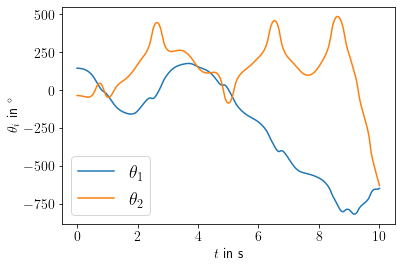

In [65]:
plt.plot(res.t, res.y[0, :]/np.pi*180, label=r"$\theta_1$")
plt.plot(res.t, res.y[1, :]/np.pi*180, label=r"$\theta_2$")
plt.legend()
#!plt.show()
plt.xlabel("$t$ in s") #!
plt.ylabel(r"$\theta_i$ in ${}^\circ$") #!
show_book("doppelpendel_ttheta_von_t") #!

`end lagrange14`

`begin lagrange15`

`end lagrange15`

In [95]:
Eges = (T+V).subs(param_values+replamcements)

Eges_func = sp.lambdify(xx, Eges)

<function _lambdifygenerated(x1, x2, x3, x4)>

In [114]:
xx0

array([ 2.51327412, -0.62831853,  0.        ,  0.        ])

In [155]:
tt = np.linspace(0, 100, 10000)
res = solve_ivp(rhs, (0, tt[-1]),  xx0*0.76, t_eval=tt, max_step=0.01)
pass

In [156]:
N = 300

XX = np.row_stack([res.y[0, :-N*2], res.y[0, N:-N], res.y[0, 2*N:]])

array([[1.91008833, 1.90958125, 1.90805924, ..., 1.07084731, 1.10556396,
        1.13956211],
       [1.67597493, 1.64833744, 1.61928991, ..., 1.91579206, 1.89989743,
        1.88259117],
       [0.56478753, 0.52599721, 0.48806328, ..., 1.43452797, 1.3941024 ,
        1.35199528]])

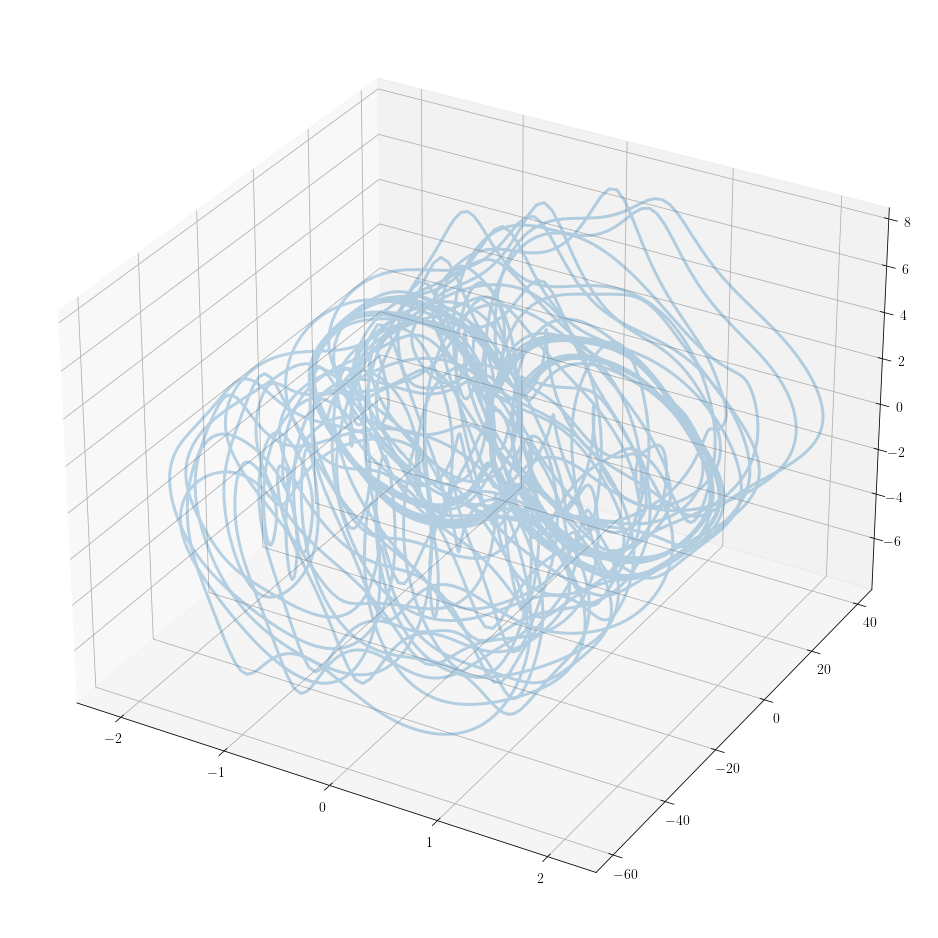

In [157]:
fig = plt.figure(figsize=(17, 17))
ax = fig.add_subplot(111, projection='3d')

ax.plot(res.y[0, :], res.y[1, :], res.y[2, :], lw=3, alpha=0.3)
# ax.plot(XX[0, :], XX[1, :], XX[2, :], lw=3)

(-1.0, 20.0)

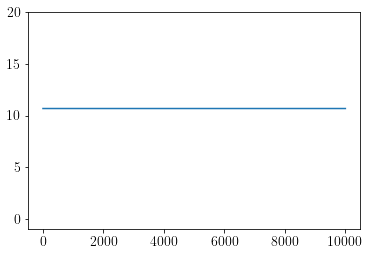

In [158]:
plt.plot(Eges_func(*res.y))
plt.ylim(-1, 20)

In [ ]:
!python3 ../../nbsnippets.py kapitel_mechanik.ipynb

In [84]:
solve_ivp?